In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
df = pd.read_csv("HI-Small_Trans.csv")
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022/09/10 23:57,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022/09/10 23:35,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022/09/10 23:46,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [3]:
df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0
5,2022/09/01 00:03,1,8000F5AD0,1,8000F5AD0,6162.44,US Dollar,6162.44,US Dollar,Reinvestment,0
6,2022/09/01 00:08,1,8000EBAC0,1,8000EBAC0,14.26,US Dollar,14.26,US Dollar,Reinvestment,0
7,2022/09/01 00:16,1,8000EC1E0,1,8000EC1E0,11.86,US Dollar,11.86,US Dollar,Reinvestment,0
8,2022/09/01 00:26,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0
9,2022/09/01 00:21,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [5]:
object_cols = df.select_dtypes('object').columns.drop('Timestamp')
df[object_cols] = df[object_cols].astype('string')

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int64         
 2   Account             string        
 3   To Bank             int64         
 4   Account.1           string        
 5   Amount Received     float64       
 6   Receiving Currency  string        
 7   Amount Paid         float64       
 8   Payment Currency    string        
 9   Payment Format      string        
 10  Is Laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(3), string(5)
memory usage: 426.2 MB


In [8]:
df.duplicated().sum()

np.int64(9)

In [9]:
df.drop_duplicates()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022-09-10 23:35:00,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022-09-10 23:52:00,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022-09-10 23:46:00,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [10]:
df.isna().sum()

,0
Timestamp,0
From Bank,0
Account,0
To Bank,0
Account.1,0
Amount Received,0
Receiving Currency,0
Amount Paid,0
Payment Currency,0
Payment Format,0


In [11]:
df.describe()

,Timestamp,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,5078345,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,2022-09-05 07:16:08.194274816,4.573057e+04,6.574456e+04,5.988726e+06,4.509273e+06,1.019427e-03
min,2022-09-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,2022-09-02 04:32:00,1.190000e+02,4.259000e+03,1.833700e+02,1.844800e+02,0.000000e+00
50%,2022-09-05 12:16:00,9.679000e+03,2.156800e+04,1.411010e+03,1.414540e+03,0.000000e+00
75%,2022-09-08 03:13:00,2.862800e+04,1.223320e+05,1.234627e+04,1.229784e+04,0.000000e+00
max,2022-09-18 16:18:00,3.563030e+05,3.562940e+05,1.046302e+12,1.046302e+12,1.000000e+00
std,NaN,8.176562e+04,8.409299e+04,1.037183e+09,8.697728e+08,3.191219e-02


In [12]:
df['Payment Format'].value_counts()

,count
Payment Format,
Cheque,1864331
Credit Card,1323324
ACH,600797
Cash,490891
Reinvestment,481056
Wire,171855
Bitcoin,146091


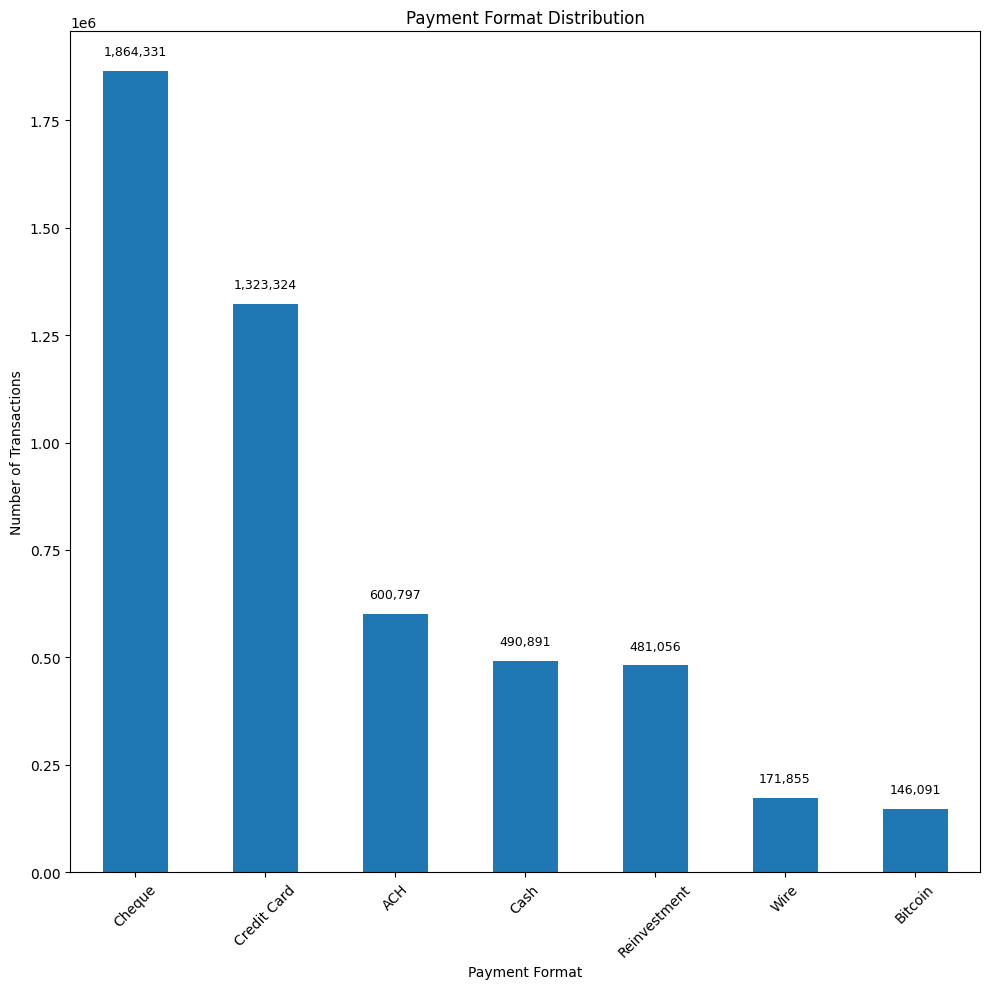

In [13]:
counts = df['Payment Format'].value_counts()
plt.figure(figsize=(10,10))
ax = counts.plot(kind='bar')
plt.ylabel('Number of Transactions')
plt.title('Payment Format Distribution')

for i, v in enumerate(counts):
    ax.text(i, v + 30000, f'{v:,}', ha='center', va='bottom', fontsize=9, rotation=0)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


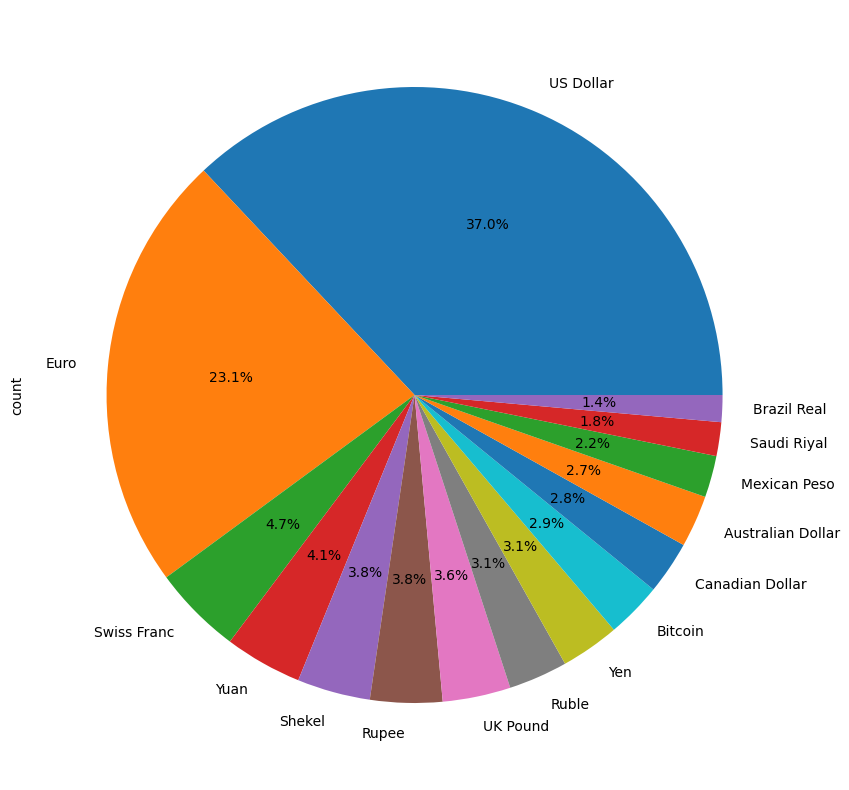

In [14]:
plt.figure(figsize=(10,10))
df['Receiving Currency'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [15]:
df['Is Laundering'].value_counts()

,count
Is Laundering,
0,5073168
1,5177


<Axes: xlabel='Is Laundering'>

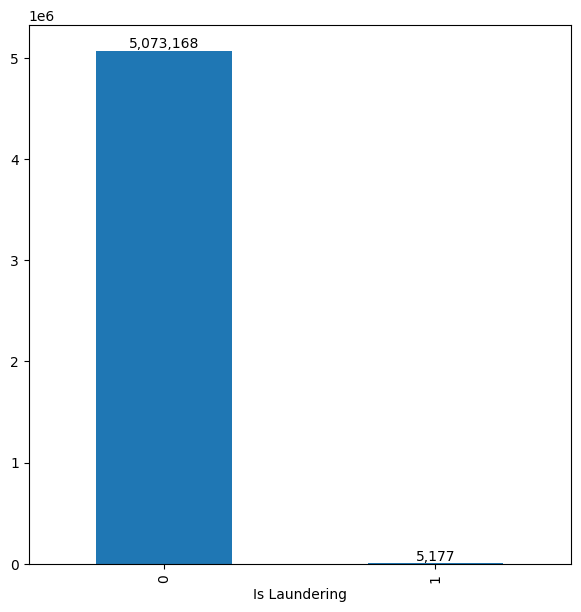

In [16]:
plt.figure(figsize=(7,7))
counts = df['Is Laundering'].value_counts()
ax = counts.plot(kind='bar')
for i,v in enumerate(df['Is Laundering'].value_counts()):
    ax.text(i, v, f'{v:,}',ha='center', va='bottom')
df['Is Laundering'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Laundering Rate by Payment Format')

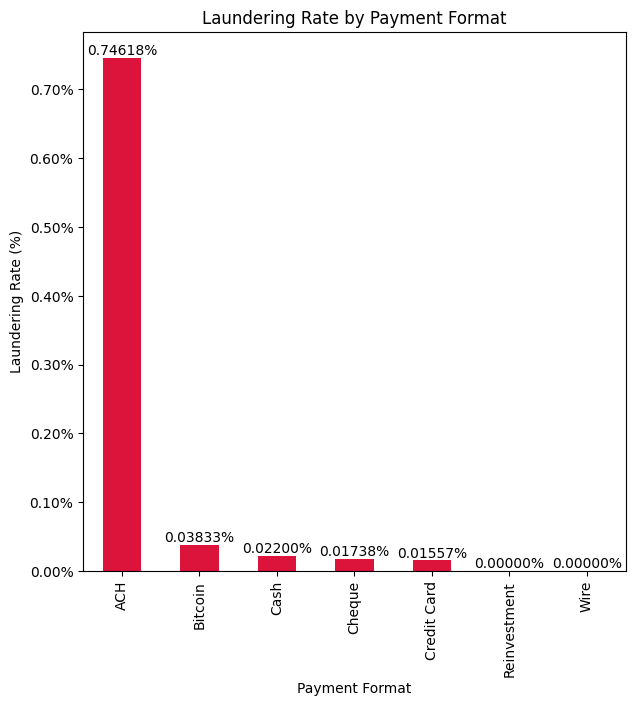

In [17]:
plt.figure(figsize=(7,7))
laundering_by_format = df.groupby('Payment Format')['Is Laundering'].mean().sort_values(ascending=False)
ax = laundering_by_format.plot(kind='bar')
for i,v in enumerate(laundering_by_format):
    ax.text(i,v,f'{v:.5%}',va = 'bottom',ha = 'center')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
laundering_by_format.plot(kind='bar', color='crimson')
plt.ylabel('Laundering Rate (%)')
plt.title('Laundering Rate by Payment Format')

In [18]:
numeric_data = df.select_dtypes('number')

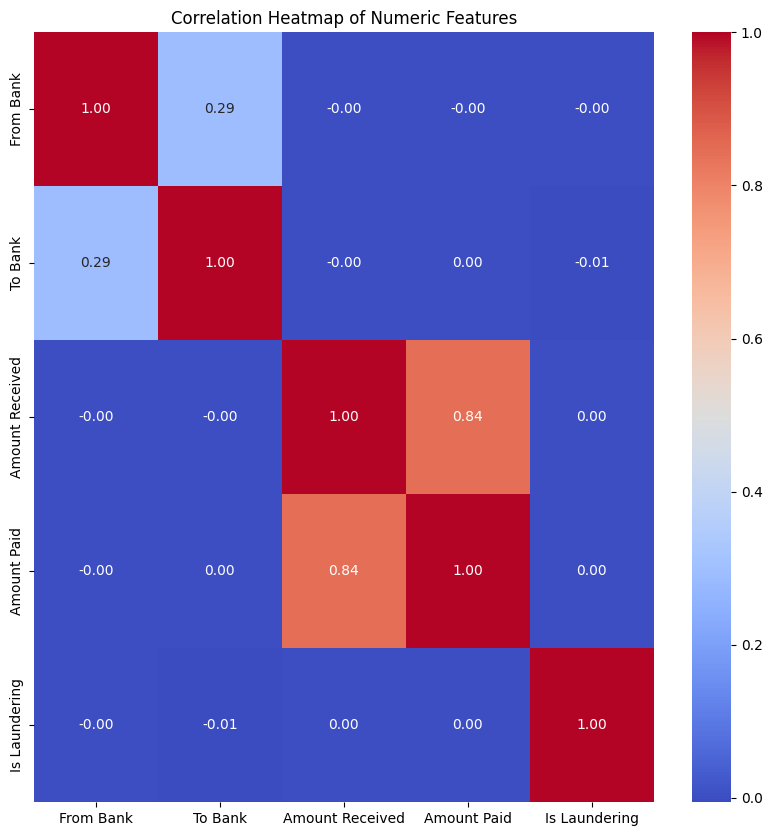

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['string']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,942,10,900,3697.34,12,3697.34,12,5,0
1,2022-09-01 00:20:00,3208,990,1,949,0.01,12,0.01,12,3,0
2,2022-09-01 00:00:00,3209,991,3209,940,14675.57,12,14675.57,12,5,0
3,2022-09-01 00:02:00,12,997,12,945,2806.97,12,2806.97,12,5,0
4,2022-09-01 00:06:00,10,999,10,947,36682.97,12,36682.97,12,5,0


In [21]:
# from sklearn.feature_selection import mutual_info_classif

# X = data.drop(['Is Laundering','Timestamp'], axis=1)
# y = data['Is Laundering']

# mi_scores = mutual_info_classif(X, y, discrete_features='auto')

In [22]:
# mi_df = pd.DataFrame({
#     'Feature': X.columns,
#     'MI Score': mi_scores
# }).sort_values(by='MI Score', ascending=False)

# print(mi_df)

In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(15, 10))

# ax = sns.barplot(x='MI Score', y='Feature', data=mi_df)

# for i, v in enumerate(mi_df['MI Score']):
#     ax.text(v, i, f'{v:.5f}', va='center', ha='left', fontsize=9, rotation='horizontal')

# plt.title('Mutual Information Score by Feature')
# plt.tight_layout()
# plt.show()


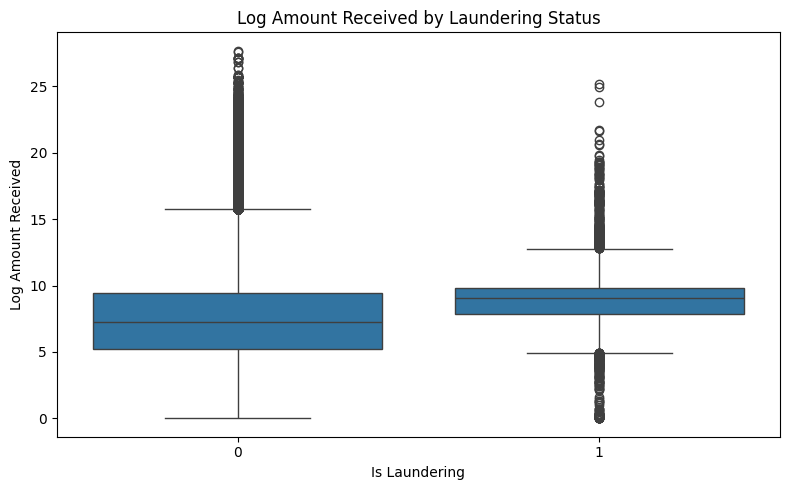

In [24]:
df['Log Amount Received'] = np.log1p(df['Amount Received'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Is Laundering', y='Log Amount Received', data=df)
plt.title('Log Amount Received by Laundering Status')
plt.tight_layout()
plt.show()


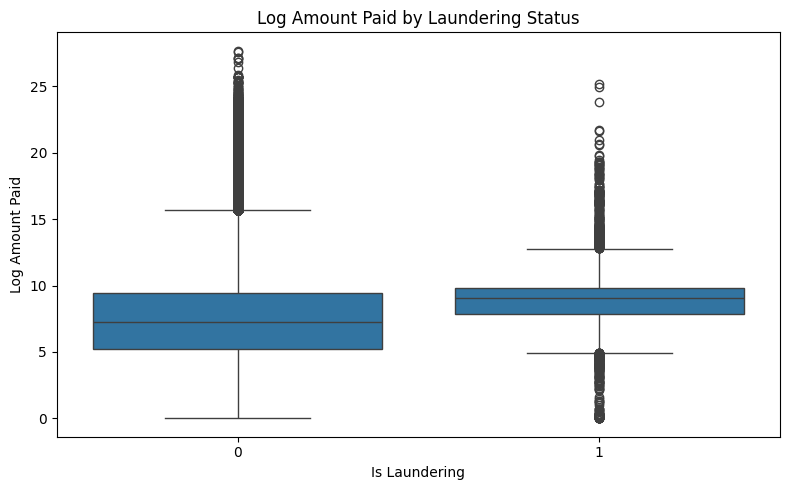

In [25]:
df['Log Amount Paid'] = np.log1p(df['Amount Paid'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df)
plt.title('Log Amount Paid by Laundering Status')
plt.tight_layout()
plt.show()


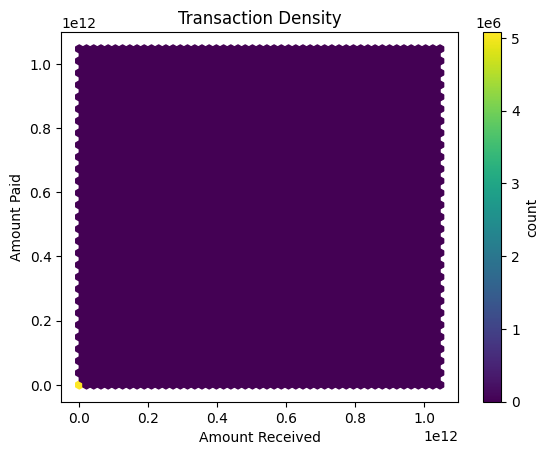

In [26]:
plt.hexbin(df["Amount Received"], df["Amount Paid"], gridsize=50)
plt.xlabel("Amount Received")
plt.ylabel("Amount Paid")
plt.title("Transaction Density")
plt.colorbar(label="count")
plt.show()


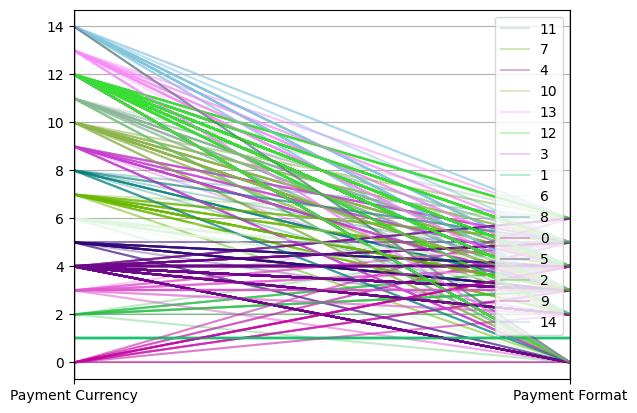

In [27]:
from pandas.plotting import parallel_coordinates
sample = df.sample(1000)
parallel_coordinates(
    sample[["Receiving Currency","Payment Currency","Payment Format"]],
    class_column="Receiving Currency",
    alpha=0.3
)
plt.show()


In [28]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Log Amount Received,Log Amount Paid
0,2022-09-01 00:20:00,10,942,10,900,3697.340000,12,3697.340000,12,5,0,8.215639,8.215639
1,2022-09-01 00:20:00,3208,990,1,949,0.010000,12,0.010000,12,3,0,0.009950,0.009950
2,2022-09-01 00:00:00,3209,991,3209,940,14675.570000,12,14675.570000,12,5,0,9.594008,9.594008
3,2022-09-01 00:02:00,12,997,12,945,2806.970000,12,2806.970000,12,5,0,7.940217,7.940217
4,2022-09-01 00:06:00,10,999,10,947,36682.970000,12,36682.970000,12,5,0,10.510095,10.510095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,495979,256398,419726,0.154978,1,0.154978,1,1,0,0.144081,0.144081
5078341,2022-09-10 23:35:00,15,495988,256398,419726,0.108128,1,0.108128,1,1,0,0.102672,0.102672
5078342,2022-09-10 23:52:00,154365,495980,256398,419726,0.004988,1,0.004988,1,1,0,0.004976,0.004976
5078343,2022-09-10 23:46:00,256398,495978,256398,419726,0.038417,1,0.038417,1,1,0,0.037697,0.037697


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Timestamp            datetime64[ns]
 1   From Bank            int64         
 2   Account              int64         
 3   To Bank              int64         
 4   Account.1            int64         
 5   Amount Received      float64       
 6   Receiving Currency   int64         
 7   Amount Paid          float64       
 8   Payment Currency     int64         
 9   Payment Format       int64         
 10  Is Laundering        int64         
 11  Log Amount Received  float64       
 12  Log Amount Paid      float64       
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 503.7 MB


In [30]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Log Amount Received,Log Amount Paid
0,2022-09-01 00:20:00,10,942,10,900,3697.340000,12,3697.340000,12,5,0,8.215639,8.215639
1,2022-09-01 00:20:00,3208,990,1,949,0.010000,12,0.010000,12,3,0,0.009950,0.009950
2,2022-09-01 00:00:00,3209,991,3209,940,14675.570000,12,14675.570000,12,5,0,9.594008,9.594008
3,2022-09-01 00:02:00,12,997,12,945,2806.970000,12,2806.970000,12,5,0,7.940217,7.940217
4,2022-09-01 00:06:00,10,999,10,947,36682.970000,12,36682.970000,12,5,0,10.510095,10.510095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,495979,256398,419726,0.154978,1,0.154978,1,1,0,0.144081,0.144081
5078341,2022-09-10 23:35:00,15,495988,256398,419726,0.108128,1,0.108128,1,1,0,0.102672,0.102672
5078342,2022-09-10 23:52:00,154365,495980,256398,419726,0.004988,1,0.004988,1,1,0,0.004976,0.004976
5078343,2022-09-10 23:46:00,256398,495978,256398,419726,0.038417,1,0.038417,1,1,0,0.037697,0.037697


In [33]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0


In [31]:
X = df.drop(['Is Laundering','Timestamp'],axis=1)
y = df['Is Laundering']

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    auc
)
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [ ]:
import _ctypes

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.3,
    random_state=42
)

In [36]:
print(X_train.shape)

(3554841, 11)


In [37]:
print(X_test.shape)

(1523504, 11)


In [38]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('clf', LogisticRegression(
        solver='saga',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

In [39]:
pipeline.fit(X_train, y_train)

y_pred  = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93   1521951
           1       0.01      0.88      0.01      1553

    accuracy                           0.86   1523504
   macro avg       0.50      0.87      0.47   1523504
weighted avg       1.00      0.86      0.93   1523504

ROC-AUC: 0.9106
PR-AUC:  0.0083
Best F1 threshold: 0.8874


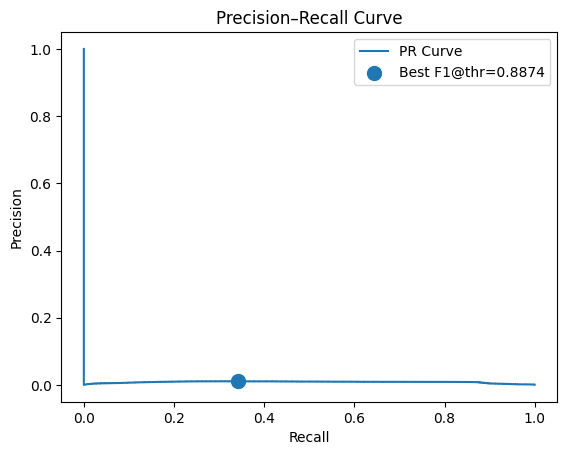

In [40]:
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC:  {average_precision_score(y_test, y_proba):.4f}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
best_idx = np.argmax(f1_scores[:-1])
best_thr = thresholds[best_idx]
print(f"Best F1 threshold: {best_thr:.4f}")

plt.figure()
plt.plot(recalls, precisions, label="PR Curve")
plt.scatter(recalls[best_idx], precisions[best_idx],
            label=f"Best F1@thr={best_thr:.4f}", s=100)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

for cls in (XGBClassifier, LGBMClassifier, RandomForestClassifier, SMOTEENN):
    if not hasattr(cls, "__sklearn_tags__"):
        cls.__sklearn_tags__ = lambda self: {}

input_dim = X_train.shape[1]

def create_mlp(input_dim=input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

def create_deep(input_dim=input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='binary_crossentropy',
                  metrics=['AUC'])
    return model

pipeline_rf = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1, random_state=42))
])

pipeline_knn = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
     ('knn',KNeighborsClassifier(n_neighbors=50))
])

pipeline_xgb = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1, eval_metric='auc',
        n_jobs=-1, random_state=42
    ))
])

pipeline_lgb = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('lgb', LGBMClassifier(
        n_estimators=200, max_depth=-1, learning_rate=0.1,
        n_jobs=-1, random_state=42
    ))
])

pipeline_mlp = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('scaler', StandardScaler()),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('mlp', KerasClassifier(build_fn=create_mlp, epochs=10, batch_size=1024, verbose=1))
])

pipeline_deep = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('scaler', StandardScaler()),
    ('undersamp', RandomUnderSampler(
        sampling_strategy=1.0,
        random_state=42)),
    ('deep', KerasClassifier(build_fn=create_deep, epochs=20, batch_size=1024, verbose=1))
])

In [51]:
for name, pipe in [
    ('RandomForest', pipeline_rf),
    ('KNN', pipeline_knn),
    ('XGBoost', pipeline_xgb),
    ('LightGBM', pipeline_lgb),
    ('MLP', pipeline_mlp),
    ('DeepNN', pipeline_deep),
]:
    print(f"\nTraining {name}...")
    pipe.fit(X_train, y_train)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    print(f"{name} ROC-AUC:", roc_auc_score(y_test, y_proba))



Training RandomForest...
RandomForest ROC-AUC: 0.9637920517043266

Training KNN...
KNN ROC-AUC: 0.7819692238717437

Training XGBoost...
XGBoost ROC-AUC: 0.9676027521090657

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 355121, number of negative: 355121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2077
[LightGBM] [Info] Number of data points in the train set: 710242, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM ROC-AUC: 0.9694577710336411

Training MLP...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.9275 - loss: 0.3320
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - AUC: 0.9654 - loss: 0.2262
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - AUC: 0.9705 - loss: 0.2087
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - AUC: 0.9728 - loss: 0.2001
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9745 - loss: 0.1942
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - AUC: 0.9753 - loss: 0.1905
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - AUC: 0.9761 - loss: 0.1868
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - AUC: 0.9769 - loss: 0.1840
Epoch 9/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.9775 - loss: 0.1814
Epoch 10/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - AUC: 0.9782 - loss: 0.1788
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
MLP ROC-AUC: 0.9668699710129028

Training DeepNN...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


694/694 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - AUC: 0.9373 - loss: 0.3032
Epoch 2/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - AUC: 0.9697 - loss: 0.2110
Epoch 3/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9737 - loss: 0.1960
Epoch 4/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9761 - loss: 0.1867
Epoch 5/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9780 - loss: 0.1796
Epoch 6/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - AUC: 0.9789 - loss: 0.1760
Epoch 7/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - AUC: 0.9796 - loss: 0.1725
Epoch 8/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9807 - loss: 0.1682
Epoch 9/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9811 - loss: 0.1662
Epoch 10/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - AUC: 0.9812 - loss: 0.1654
Epoch 11/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - AUC: 0.9816 - loss: 0.1639
Epoch 12/20
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - AUC: 0.9824 - loss: 0.1608
Epoch 13/20
69

In [ ]:
# pipelines = {
#     'LogisticRegression': Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', LogisticRegression(max_iter=10000,random_state=42))
#     ]),
#     'SVM':Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf',SVC(probability=True, random_state=42))
#     ]),
#     'RandomForest': Pipeline([
#         ('clf', RandomForestClassifier(random_state=42))
#     ]),
#     'DecisionTree':Pipeline([
#         ('clf',DecisionTreeClassifier(random_state=42))
#     ]),
#     'KNN':Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf',KNeighborsClassifier())
#     ]),
#     'Gaussian Naive Bayes':Pipeline([
#         ('clf',GaussianNB())
#     ]),
#     'Multinomial Naive Bayes':Pipeline([
#         ('clf',MultinomialNB())
#     ]),
#     'Bernoulli Naive Bayes':Pipeline([
#         ('clf',BernoulliNB())
#     ]),
#     'Complement Naive Bayes':Pipeline([
#         ('clf',ComplementNB())
#     ]),
#     'Categorical Naive bayes':Pipeline([
#         ('clf',CategoricalNB())
#     ])
# }